In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/titanic/gender_submission.csv')

# Data Analysis

In [4]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 4, "Rev": 5, "Col": 6, "Major": 7, "Mlle": 8, "Countess": 9, "Ms": 10, "Lady": 11, "Jonkheer": 12, "Don": 13, "Dona": 14}

train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)



### Train data



In [5]:
train.shape

(891, 13)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [7]:
train.info()
print(train.describe())
train.isnull().sum().sort_values(ascending = False)[0:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        888 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.52

Cabin          687
Age            177
Title            3
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

### Test data

In [8]:
test.shape

(418, 12)

In [9]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [10]:
test.info()
print(test.describe())
test.isnull().sum().sort_values(ascending = False)[0:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
       PassengerId      Pclass         Age       SibSp       Parch  \
count   418.000000  418.000000  332.000000  418.000000  418.000000   
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   
std     120.810458    0.841838   1

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
Title            0
dtype: int64

### Submission

In [11]:
sub.shape

(418, 2)

In [12]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Data Vizualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
data = pd.concat([train, test], ignore_index=True)

In [15]:
corr = train.corr(method="pearson")
corr.style.background_gradient(cmap="coolwarm")

<ipython-input-15-ae1a366c9911>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr(method="pearson")


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.018638
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.329816
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.195340
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.055022
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.181361
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.212901
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.100996
Title,0.018638,0.329816,-0.195340,-0.055022,0.181361,0.212901,0.100996,1.000000


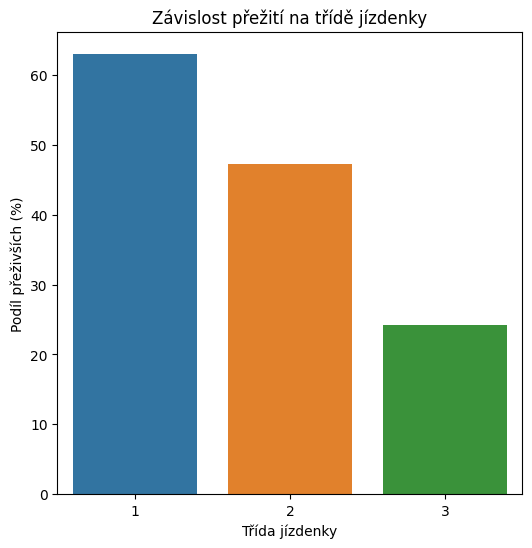

In [16]:
plt.figure(figsize=(6, 6))
sns.barplot(data=train, x='Pclass', y='Survived', errorbar=None, estimator=lambda x: sum(x) / len(x) * 100),
plt.xlabel('Třída jízdenky')
plt.ylabel('Podíl přeživších (%)')
plt.title('Závislost přežití na třídě jízdenky')
plt.show()


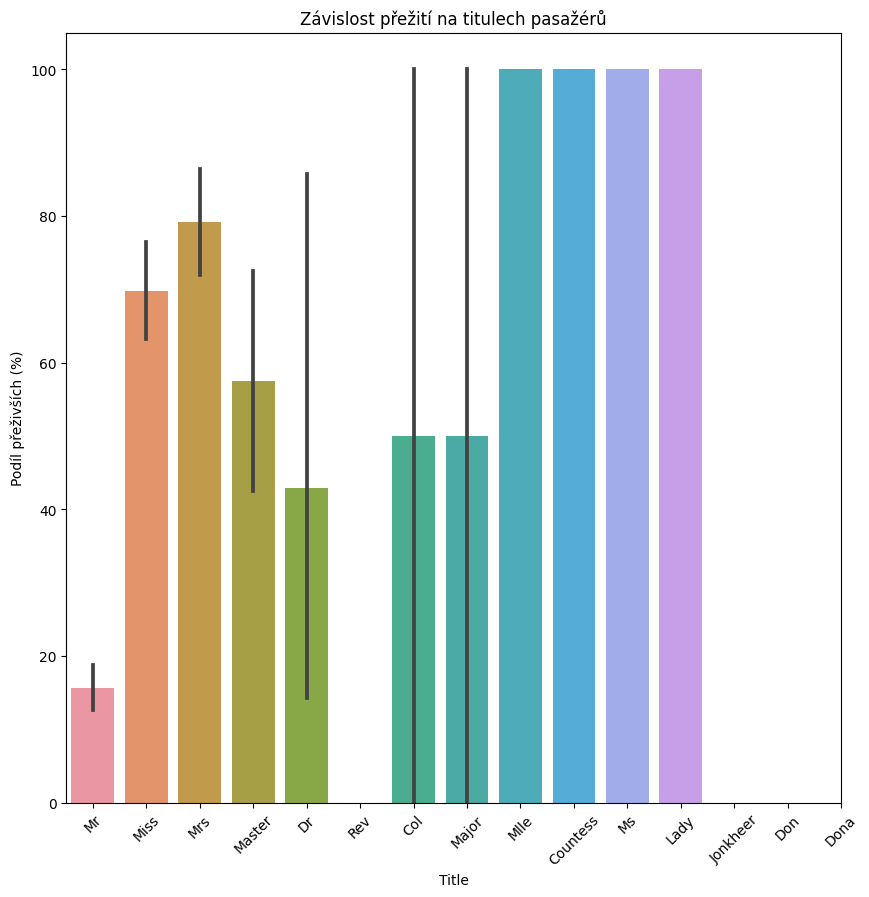

In [17]:
plt.figure(figsize=(10, 10))
barplot = sns.barplot(data=train, x='Title', y='Survived', estimator=lambda x: sum(x) / len(x) * 100)

title_labels = ["Mr", "Miss", "Mrs", "Master", "Dr", "Rev", "Col", "Major", "Mlle", "Countess", "Ms", "Lady", "Jonkheer", "Don", "Dona"]
barplot.set_xticks(range(len(title_labels)))
barplot.set_xticklabels(title_labels, rotation=45)

plt.xlabel('Title')
plt.ylabel('Podíl přeživších (%)')
plt.title('Závislost přežití na titulech pasažérů')
plt.show()

Number of Males: 843
Number of Females: 466
Number of Male Survivors: 109
Number of Female Survivors: 233


Text(0, 0.5, 'Count')

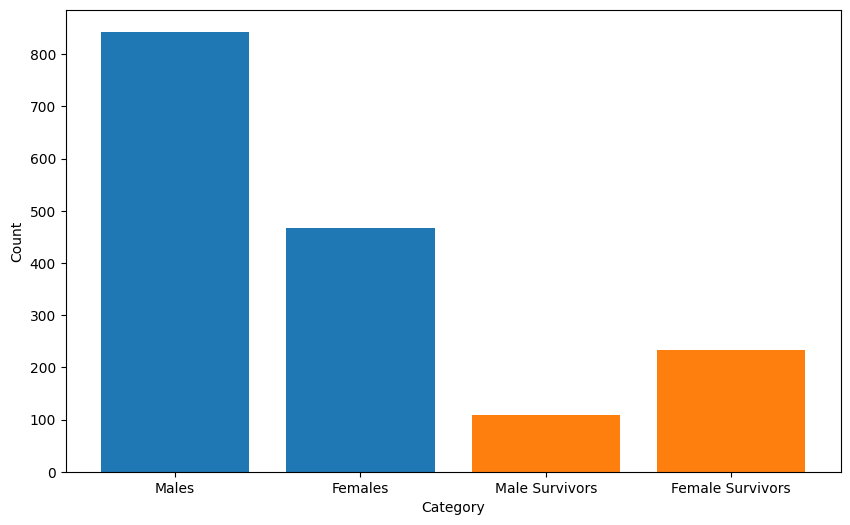

In [18]:
num_male = len(data[data['Sex'] == 'male'])
num_female = len(data[data['Sex'] == 'female'])

male_survivors = len(data[(data['Sex'] == 'male') & (train['Survived'] == 1)])
female_survivors = len(data[(data['Sex'] == 'female') & (train['Survived'] == 1)])

print("Number of Males:", num_male)
print("Number of Females:", num_female)
print("Number of Male Survivors:", male_survivors)
print("Number of Female Survivors:", female_survivors)

labels_all = ['Males', 'Females']
counts_all = [num_male, num_female]
labels_surv = ['Male Survivors', 'Female Survivors']
counts_surv = [male_survivors, female_survivors]

plt.figure(figsize=(10, 6))
plt.bar(labels_all, counts_all)
plt.xlabel('Category')
plt.ylabel('Count')
plt.bar(labels_surv, counts_surv)
plt.xlabel('Category')
plt.ylabel('Count')

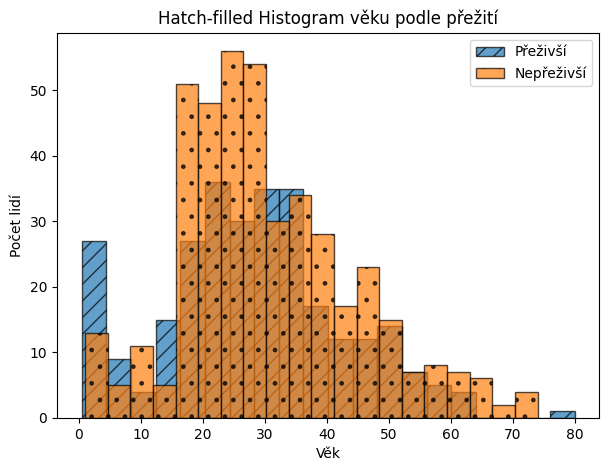

In [19]:
import matplotlib.pyplot as plt

# Rozdělení dat na dvě skupiny: přeživší a nepřeživší
transported = data[data['Survived'] == 1]
not_transported = data[data['Survived'] == 0]

# Nastavení velikosti grafu
plt.figure(figsize=(7, 5))

# Vytvoření hatch-filled histogramu pro přeživší s křížovým vzorem
plt.hist(transported['Age'], bins=20, alpha=0.7, label='Přeživší', hatch='//', edgecolor='black')

# Vytvoření hatch-filled histogramu pro nepřeživší s tečkovaným vzorem
plt.hist(not_transported['Age'], bins=20, alpha=0.7, label='Nepřeživší', hatch='.', edgecolor='black')

# Popisky a popis os
plt.xlabel('Věk')
plt.ylabel('Počet lidí')
plt.title('Hatch-filled Histogram věku podle přežití')
plt.legend()

# Zobrazit graf
plt.show()

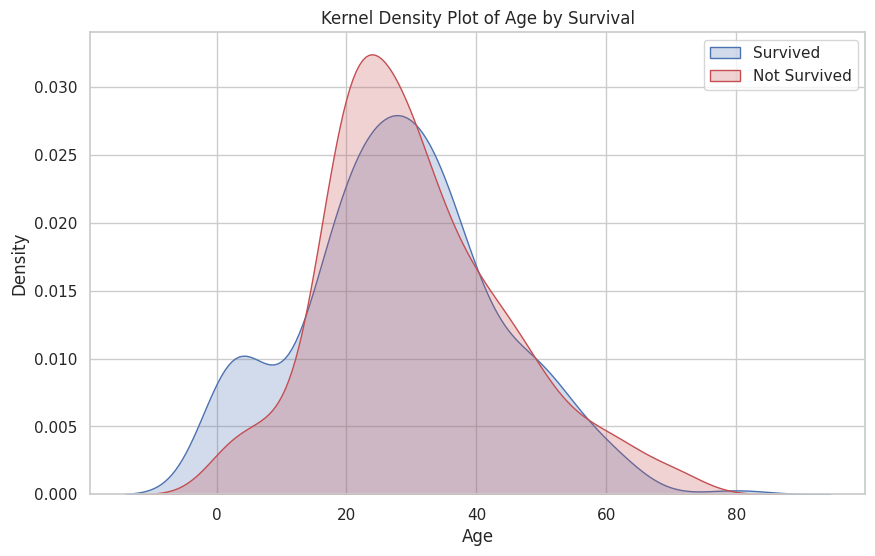

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nastavení stylu grafů
sns.set(style="whitegrid")

# Vytvoření grafu kernelové hustoty pro přeživší
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Survived'] == 1]['Age'], label='Survived', fill=True, color='b')
sns.kdeplot(data[data['Survived'] == 0]['Age'], label='Not Survived', fill=True, color='r')


# Nastavení popisků a titulu
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Age by Survival')

# Legenda
plt.legend()

# Zobrazení grafu
plt.show()


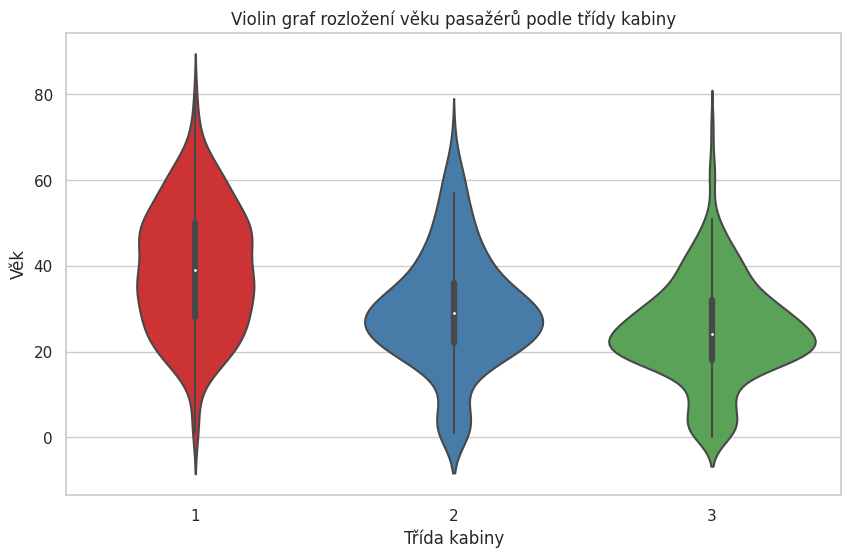

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(data, x='Pclass', y='Age', palette='Set1')
plt.xlabel('Třída kabiny')
plt.ylabel('Věk')
plt.title('Violin graf rozložení věku pasažérů podle třídy kabiny')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.3% of the points cannot be placed

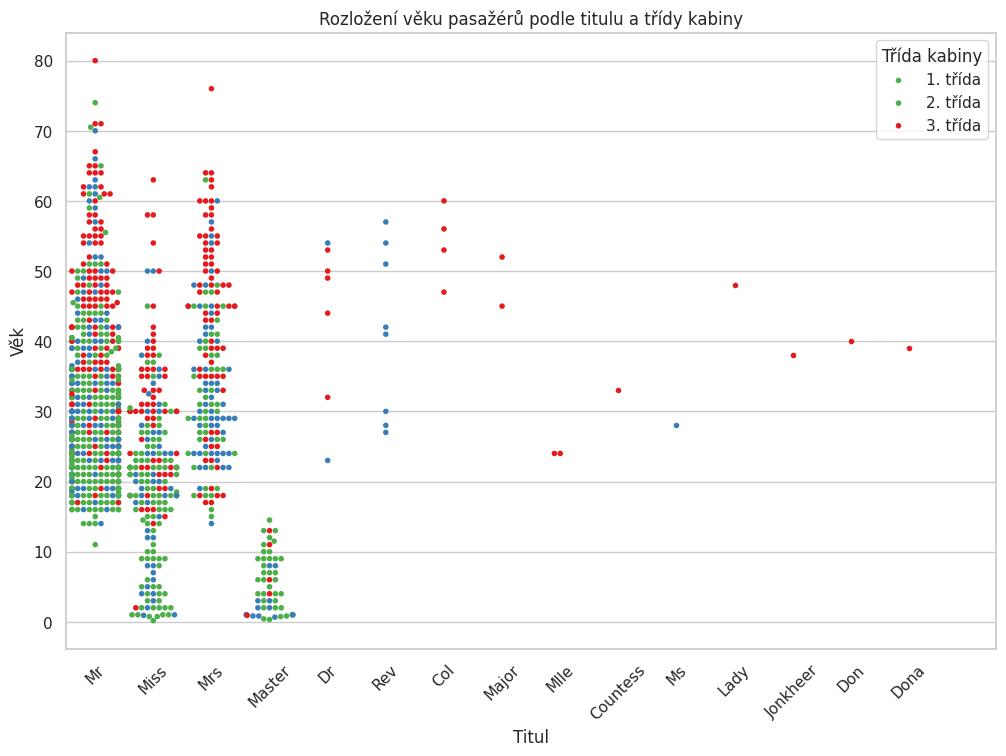

In [22]:
data_to_plot = data[['Pclass', 'Title', 'Age']]
plt.figure(figsize=(12, 8))
sns.swarmplot(data=data_to_plot, x='Title', y='Age', hue='Pclass', palette='Set1', size=4)
title_labels = ["Mr", "Miss", "Mrs", "Master", "Dr", "Rev", "Col", "Major", "Mlle", "Countess", "Ms", "Lady", "Jonkheer", "Don", "Dona"]
plt.xticks(ticks=range(len(title_labels)), labels=title_labels, rotation=45)
plt.xlabel('Titul')
plt.ylabel('Věk')
plt.title('Rozložení věku pasažérů podle titulu a třídy kabiny')
plt.legend(title='Třída kabiny', loc='upper right', labels=['1. třída', '2. třída', '3. třída'])
plt.show()


<Figure size 1000x600 with 0 Axes>

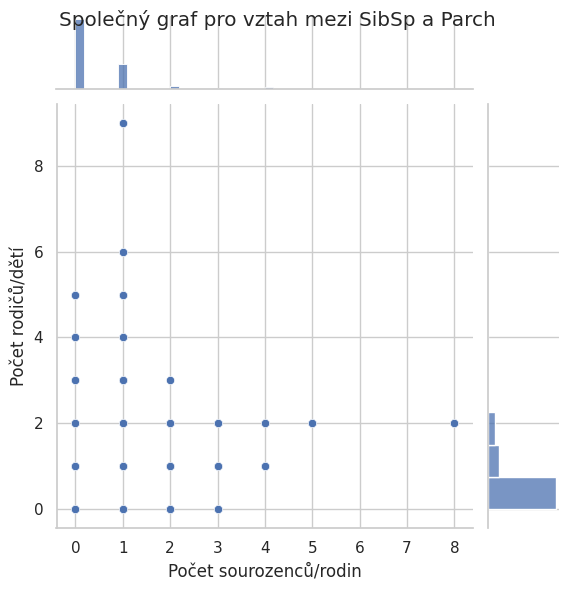

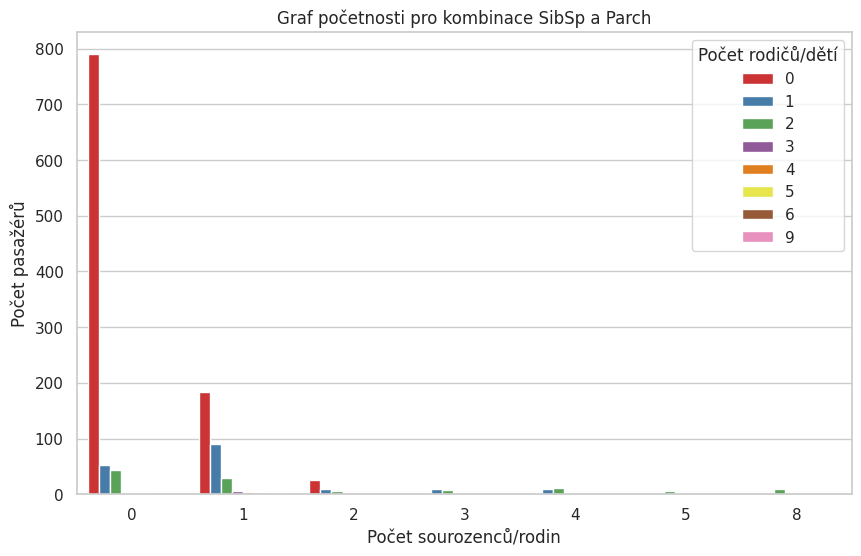

In [23]:
# Vytvoření společného grafu (Joint Plot)
plt.figure(figsize=(10, 6))
sns.jointplot(data, x='SibSp', y='Parch', kind='scatter')
plt.xlabel('Počet sourozenců/rodin')
plt.ylabel('Počet rodičů/dětí')
plt.suptitle('Společný graf pro vztah mezi SibSp a Parch')

# Vytvoření grafu početnosti (Count Plot) pro kombinace SibSp a Parch
plt.figure(figsize=(10, 6))
sns.countplot(data, x='SibSp', hue='Parch', palette='Set1')
plt.xlabel('Počet sourozenců/rodin')
plt.ylabel('Počet pasažérů')
plt.title('Graf početnosti pro kombinace SibSp a Parch')
plt.legend(title='Počet rodičů/dětí', loc='upper right')

plt.show()


# Preprocessing

In [24]:
from sklearn.base import TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


In [25]:
x = train.drop(["Survived"], axis=1)
y = train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


X_train = X_train.drop(["Cabin", "Name", "Ticket", "PassengerId"], axis=1)
X_test = X_test.drop(["Cabin", "Name", "Ticket", "PassengerId"], axis=1)

In [26]:
x = train.drop(["Survived"], axis=1)
y = train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

X_train = X_train.drop(["Cabin", "Name", "Ticket", "PassengerId"], axis=1)
X_test = X_test.drop(["Cabin", "Name", "Ticket", "PassengerId"], axis=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(712, 8)
(179, 8)
(712,)
(179,)


In [33]:
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer

In [34]:
class MostFrequentImputer(TransformerMixin):
    def __init__(self):
        self.most_frequent_values = None

    def fit(self, X, y=None):
        self.most_frequent_values = X.mode().iloc[0]
        return self

    def transform(self, X):
        return X.fillna(self.most_frequent_values)

    def get_feature_names_out(self, input_features=None):
        return input_features  # Vrací názvy sloupců po transformaci

from sklearn.preprocessing import OneHotEncoder

# Definice OneHotEncoder pro sloupce Sex a Embarked
sex_onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
embarked_onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

sex_pipe = Pipeline([
    ('imputer', MostFrequentImputer()),
    ('encoder', sex_onehot_encoder)
])

embarked_pipe = Pipeline([
    ('imputer', MostFrequentImputer()),
    ('encoder', embarked_onehot_encoder)
])
# Preprocessing pro numerické atributy - vytvoření dvou transformací a spojení je dohromady pomocí FeatureUnion
numerical_pipe = FeatureUnion(transformer_list=[
    ('title_imputer', Pipeline([
        ('imputer', SimpleImputer(strategy='median'))
    ])),
    ('age_imputer', Pipeline([
        ('imputer', SimpleImputer(strategy='median'))
    ])),
    ('scaler', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
    ]))
])

# Definice preprocesoru pro zpracování jednotlivých sloupců
preprocessor = ColumnTransformer([
    ('num', numerical_pipe, ['Age', 'Title']),
    ('sex', sex_pipe, ['Sex']),
    ('embarked', embarked_pipe, ['Embarked']),
], remainder='passthrough')


In [35]:
# Natrénování preprocessoru
preprocessor.fit(X_train)

# Získání názvů sloupců
feature_names = preprocessor.get_feature_names_out()
print(feature_names)

['num__title_imputer__Age' 'num__title_imputer__Title'
 'num__age_imputer__Age' 'num__age_imputer__Title' 'num__scaler__Age'
 'num__scaler__Title' 'sex__Sex_male' 'embarked__Embarked_Q'
 'embarked__Embarked_S' 'remainder__Pclass' 'remainder__SibSp'
 'remainder__Parch' 'remainder__Fare']


In [36]:
# Definice seznamu sloupců, které budou vytvořeny v každém z preprocesorů
title_imputer_columns = ['Title']
age_imputer_columns = ['Age']
scaler_columns = ['Age', 'Title']

# Definice seznamu sloupců pro 'Sex' a 'Embarked'
sex_columns = ['Sex']
embarked_columns = ['Embarked']

# Získání seznamu sloupců vytvořených během předzpracování
created_columns = (
    title_imputer_columns +
    age_imputer_columns +
    scaler_columns +
    sex_columns +
    embarked_columns
)

# Vytiskněte seznam sloupců
print("Columns created during preprocessing:")
for column in created_columns:
    print(column)


Columns created during preprocessing:
Title
Age
Age
Title
Sex
Embarked


# Machine Learning

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

# Random Forest Classifier

In [38]:
# Define the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Create a pipeline
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('clf', random_forest_model)
])

param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for Random Forest
random_forest_grid_search = GridSearchCV(estimator=random_forest_pipeline, param_grid=param_grid, cv=3, scoring='accuracy')

# Train the pipeline
random_forest_grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         FeatureUnion(transformer_list=[('title_imputer',
                                                                                                         Pipeline(steps=[('imputer',
                                                                                                                          SimpleImputer(strategy='median'))])),
                                                                                                        ('age_imputer',
                                                                                                         Pipeline(steps=[('imputer',
                                                                                                                          SimpleImputer(strategy='median'))])),
                                                                                                        ('scaler',
                                                                                                         Pipeline(steps=[('imputer'...
                                                                                          <__main__.MostFrequentImputer object at 0x7a57f6921ed0>),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['Embarked'])])),
                                       ('scaler', StandardScaler()),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'clf__max_depth': [None, 10, 20, 30],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [39]:
# Nejlepší kombinace hyperparametrů a přesnost
best_params = random_forest_grid_search.best_params_

print("Nejlepší kombinace hyperparametrů:", best_params)

Nejlepší kombinace hyperparametrů: {'clf__max_depth': 10, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__n_estimators': 50}


In [40]:
# Predikce na testovacích datech s nejlepšími parametry
y_pred_rf = random_forest_grid_search.predict(X_test)

# Výpočet metrik
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Výpis metrik
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.83
Precision: 0.83
Recall: 0.74
F1-Score: 0.79
Confusion Matrix:
[[94 11]
 [19 55]]


### Feature Importance

In [41]:
"""
import time

import numpy as np

start_time = time.time()
importances = best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
"""

'\nimport time\n\nimport numpy as np\n\nstart_time = time.time()\nimportances = best_model.feature_importances_\nstd = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)\nelapsed_time = time.time() - start_time\n\nprint(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")\n'

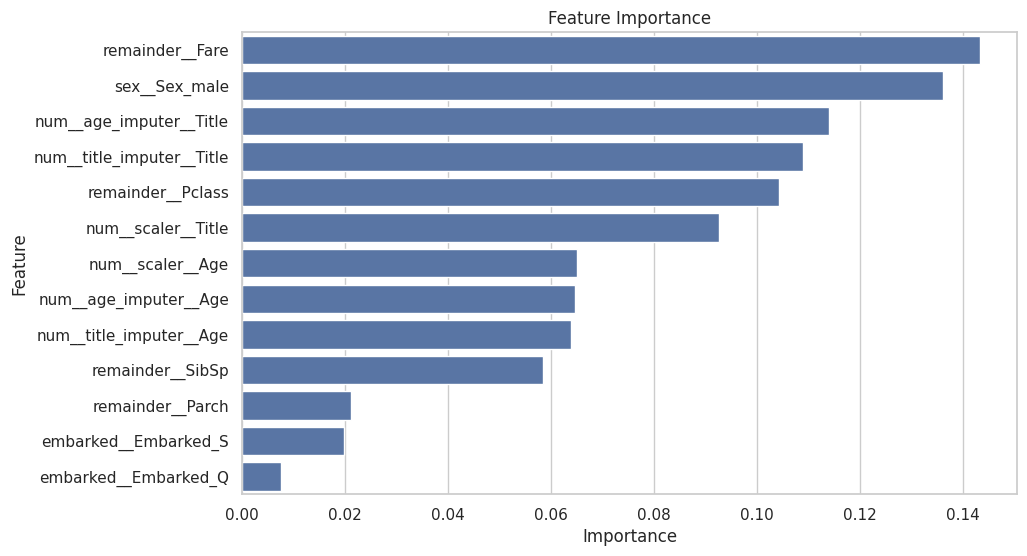

In [42]:
 # Získání modelu z grid searchu
best_model = random_forest_grid_search.best_estimator_.named_steps['clf']

# Získání seznamu názvů sloupců použitých při tréninku modelu
feature_names = ['num__title_imputer__Age', 'num__title_imputer__Title',
 'num__age_imputer__Age', 'num__age_imputer__Title', 'num__scaler__Age',
 'num__scaler__Title', 'sex__Sex_male', 'embarked__Embarked_Q',
 'embarked__Embarked_S', 'remainder__Pclass', 'remainder__SibSp',
 'remainder__Parch', 'remainder__Fare']

# Získání důležitosti rysů z modelu
importances = best_model.feature_importances_

# Vytvoření DataFrame pro lepší vizualizaci
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Seřazení DataFrame podle důležitosti
feature_importances_df = feature_importances.sort_values('Importance', ascending=False)

# Vykreslení důležitosti rysů
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances_df, x='Importance', y='Feature', color='b')
plt.title('Feature Importance')
plt.show()

## Bagging Random Forest

In [43]:
"""
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Define the base classifier for Bagging (Random Forest in this case)
random_forest_model = RandomForestClassifier(random_state=42)

# Create a BaggingClassifier with Random Forest as the base classifier
bagging_random_forest_model = BaggingClassifier(estimator=random_forest_model, random_state=42)

# Create a pipeline for Bagging with Random Forest
bagging_random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('clf', bagging_random_forest_model)
])

# Define hyperparameters for GridSearchCV for Bagging with Random Forest
bagging_random_forest_param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_samples': [0.5, 0.7, 0.9],
    'clf__max_features': [0.5, 0.7, 0.9]
}

# Create a GridSearchCV object for Bagging with Random Forest
bagging_random_forest_grid_search = GridSearchCV(estimator=bagging_random_forest_pipeline, param_grid=bagging_random_forest_param_grid, cv=3, scoring='accuracy')

# Train the Bagging with Random Forest pipeline
bagging_random_forest_grid_search.fit(X_train, y_train)
"""


"\nfrom sklearn.ensemble import RandomForestClassifier, BaggingClassifier\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the base classifier for Bagging (Random Forest in this case)\nrandom_forest_model = RandomForestClassifier(random_state=42)\n\n# Create a BaggingClassifier with Random Forest as the base classifier\nbagging_random_forest_model = BaggingClassifier(estimator=random_forest_model, random_state=42)\n\n# Create a pipeline for Bagging with Random Forest\nbagging_random_forest_pipeline = Pipeline(steps=[\n    ('preprocessor', preprocessor),\n    ('scaler', StandardScaler()),\n    ('clf', bagging_random_forest_model)\n])\n\n# Define hyperparameters for GridSearchCV for Bagging with Random Forest\nbagging_random_forest_param_grid = {\n    'clf__n_estimators': [50, 100, 200],\n    'clf__max_samples': [0.5, 0.7, 0.9],\n    'clf__max_features': [0.5, 0.7, 0.9]\n}\n\n# Create a 

In [44]:
"""
# Predikce na testovacích datech s nejlepšími parametry
y_pred_rfbg = bagging_random_forest_grid_search.predict(X_test)

# Výpočet metrik
accuracy = accuracy_score(y_test, y_pred_rfbg)
precision = precision_score(y_test, y_pred_rfbg)
recall = recall_score(y_test, y_pred_rfbg)
f1 = f1_score(y_test, y_pred_rfbg)
conf_matrix = confusion_matrix(y_test, y_pred_rfbg)

# Výpis metrik
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
"""

'\n# Predikce na testovacích datech s nejlepšími parametry\ny_pred_rfbg = bagging_random_forest_grid_search.predict(X_test)\n\n# Výpočet metrik\naccuracy = accuracy_score(y_test, y_pred_rfbg)\nprecision = precision_score(y_test, y_pred_rfbg)\nrecall = recall_score(y_test, y_pred_rfbg)\nf1 = f1_score(y_test, y_pred_rfbg)\nconf_matrix = confusion_matrix(y_test, y_pred_rfbg)\n\n# Výpis metrik\nprint(f"Accuracy: {accuracy:.2f}")\nprint(f"Precision: {precision:.2f}")\nprint(f"Recall: {recall:.2f}")\nprint(f"F1-Score: {f1:.2f}")\nprint("Confusion Matrix:")\nprint(conf_matrix)\n'

## Decision Tree Classifier

In [45]:
# Define the Random Decision tree
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Create a pipeline
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('clf', decision_tree_model)
])

param_grid = {
    'clf__min_samples_split': [5, 10, 15],
    'clf__max_depth': [None, 5, 10, 20],
    'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_leaf': [1, 2, 6],
    'clf__max_features': ['sqrt', 'log2'],
    'clf__min_impurity_decrease': [0.0, 0.1, 0.2],
}

# Create a GridSearchCV object for Random Forest
decision_tree_grid_search = GridSearchCV(estimator=decision_tree_pipeline, param_grid=param_grid, cv=3, scoring='accuracy')

# Train the pipeline
decision_tree_grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         FeatureUnion(transformer_list=[('title_imputer',
                                                                                                         Pipeline(steps=[('imputer',
                                                                                                                          SimpleImputer(strategy='median'))])),
                                                                                                        ('age_imputer',
                                                                                                         Pipeline(steps=[('imputer',
                                                                                                                          SimpleImputer(strategy='median'))])),
                                                                                                        ('scaler',
                                                                                                         Pipeline(steps=[('imputer'...
                                                                                                        sparse_output=False))]),
                                                                         ['Embarked'])])),
                                       ('scaler', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [None, 5, 10, 20],
                         'clf__max_features': ['sqrt', 'log2'],
                         'clf__min_impurity_decrease': [0.0, 0.1, 0.2],
                         'clf__min_samples_leaf': [1, 2, 6],
                         'clf__min_samples_split': [5, 10, 15]},
             scoring='accuracy')

In [46]:
# Nejlepší kombinace hyperparametrů a přesnost
best_params = decision_tree_grid_search.best_params_
print("Nejlepší kombinace hyperparametrů:", best_params)



Nejlepší kombinace hyperparametrů: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_impurity_decrease': 0.0, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10}


In [47]:
# Predikce na testovacích datech s nejlepšími parametry
y_pred_dt = decision_tree_grid_search.predict(X_test)

# Výpočet metrik
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Výpis metrik
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.80
Precision: 0.78
Recall: 0.73
F1-Score: 0.76
Confusion Matrix:
[[90 15]
 [20 54]]


## Extra Tree Classifier

In [48]:
# Define the Random Decision tree
extra_tree_model = ExtraTreeClassifier(random_state=42)

# Create a pipeline
extra_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('clf', extra_tree_model)
])

param_grid = {
    'clf__min_samples_split': [2, 5, 10, 20],
    'clf__max_depth': [None, 10, 15, 20, 30],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_features': [None, 'sqrt', 'log2', 0.5]
}

# Create a GridSearchCV object for Random Forest
extra_tree_grid_search = GridSearchCV(estimator=extra_tree_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the pipeline
extra_tree_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         FeatureUnion(transformer_list=[('title_imputer',
                                                                                                         Pipeline(steps=[('imputer',
                                                                                                                          SimpleImputer(strategy='median'))])),
                                                                                                        ('age_imputer',
                                                                                                         Pipeline(steps=[('imputer',
                                                                                                                          SimpleImputer(strategy='median'))])),
                                                                                                        ('scaler',
                                                                                                         Pipeline(steps=[('imputer'...
                                                                                          <__main__.MostFrequentImputer object at 0x7a57f6921ed0>),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['Embarked'])])),
                                       ('scaler', StandardScaler()),
                                       ('clf',
                                        ExtraTreeClassifier(random_state=42))]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [None, 10, 15, 20, 30],
                         'clf__max_features': [None, 'sqrt', 'log2', 0.5],
                         'clf__min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [49]:
# Nejlepší kombinace hyperparametrů a přesnost
best_params = extra_tree_grid_search.best_params_

print("Nejlepší kombinace hyperparametrů:", best_params)

Nejlepší kombinace hyperparametrů: {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__max_features': None, 'clf__min_samples_split': 5}


In [50]:
# Predikce na testovacích datech s nejlepšími parametry
y_pred_et = extra_tree_grid_search.predict(X_test)

# Výpočet metrik
accuracy = accuracy_score(y_test, y_pred_et)
precision = precision_score(y_test, y_pred_et)
recall = recall_score(y_test, y_pred_et)
f1 = f1_score(y_test, y_pred_et)
conf_matrix = confusion_matrix(y_test, y_pred_et)

# Výpis metrik
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.82
Precision: 0.83
Recall: 0.72
F1-Score: 0.77
Confusion Matrix:
[[94 11]
 [21 53]]


## XG Boost

In [51]:
# Define the XGBoost model
xgboost_model = xgb.XGBClassifier(random_state=42)

# Create a pipeline for XGBoost
xgboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', xgboost_model)
])

# Define hyperparameters for GridSearchCV for XGBoost
xgboost_param_grid = {
    'clf__n_estimators': [100, 200, 300],  # Počet stromů v ensemble
    'clf__max_depth': [3, 4, 5, 6],  # Maximální hloubka stromů
    'clf__learning_rate': [0.01, 0.1, 0.2],  # Rychlost učení
    'clf__subsample': [0.8, 0.9, 1.0],  # Podmnožina tréninkových dat použitá v každém kroku
    'clf__colsample_bytree': [0.8, 0.9, 1.0],  # Podmnožina funkcí použitých v každém stromu
    'clf__eval_metric': ['logloss'],  # Metrika pro hodnocení
}

# Create a GridSearchCV object for XGBoost
xgboost_grid_search = GridSearchCV(estimator=xgboost_pipeline, param_grid=xgboost_param_grid, cv=3, scoring='accuracy')

# Train the XGBoost pipeline
xgboost_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         FeatureUnion(transformer_list=[('title_imputer',
                                                                                                         Pipeline(steps=[('imputer',
                                                                                                                          SimpleImputer(strategy='median'))])),
                                                                                                        ('age_imputer',
                                                                                                         Pipeline(steps=[('imputer',
                                                                                                                          SimpleImputer(strategy='median'))])),
                                                                                                        ('scaler',
                                                                                                         Pipeline(steps=[('imputer'...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid={'clf__colsample_bytree': [0.8, 0.9, 1.0],
                         'clf__eval_metric': ['logloss'],
                         'clf__learning_rate': [0.01, 0.1, 0.2],
                         'clf__max_depth': [3, 4, 5, 6],
                         'clf__n_estimators': [100, 200, 300],
                         'clf__subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [52]:
# Nejlepší kombinace hyperparametrů a přesnost
best_params = xgboost_grid_search.best_params_

print("Nejlepší kombinace hyperparametrů:", best_params)

Nejlepší kombinace hyperparametrů: {'clf__colsample_bytree': 1.0, 'clf__eval_metric': 'logloss', 'clf__learning_rate': 0.01, 'clf__max_depth': 6, 'clf__n_estimators': 300, 'clf__subsample': 1.0}


In [53]:
# Predikce na testovacích datech s nejlepšími parametry
y_pred_xgb = xgboost_grid_search.predict(X_test)

# Výpočet metrik
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Výpis metrik
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Matice záměn:")
print(conf_matrix)

Accuracy: 0.84
Precision: 0.84
Recall: 0.76
F1-Score: 0.79
Matice záměn:
[[94 11]
 [18 56]]


## LogisticRegression

In [54]:
# Define the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Create a pipeline for Logistic Regression
logistic_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('clf', logistic_regression_model)
])

# Define hyperparameters for GridSearchCV for Logistic Regression
logistic_regression_param_grid = {
    'clf__C': [0.1, 1.0, 10.0],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs'],
    'clf__max_iter': [100, 500, 1000]
}

# Create a GridSearchCV object for Logistic Regression
logistic_regression_grid_search = GridSearchCV(estimator=logistic_regression_pipeline, param_grid=logistic_regression_param_grid, cv=3, scoring='accuracy')

# Train the Logistic Regression pipeline
logistic_regression_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         FeatureUnion(transformer_list=[('title_imputer',
                                                                                                         Pipeline(steps=[('imputer',
                                                                                                                          SimpleImputer(strategy='median'))])),
                                                                                                        ('age_imputer',
                                                                                                         Pipeline(steps=[('imputer',
                                                                                                                          SimpleImputer(strategy='median'))])),
                                                                                                        ('scaler',
                                                                                                         Pipeline(steps=[('imputer'...
                                                                         Pipeline(steps=[('imputer',
                                                                                          <__main__.MostFrequentImputer object at 0x7a57f6921ed0>),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['Embarked'])])),
                                       ('scaler', StandardScaler()),
                                       ('clf',
                                        LogisticRegression(random_state=42))]),
             param_grid={'clf__C': [0.1, 1.0, 10.0],
                         'clf__max_iter': [100, 500, 1000],
                         'clf__penalty': ['l2'], 'clf__solver': ['lbfgs']},
             scoring='accuracy')

In [55]:
# Predikce na testovacích datech s nejlepšími parametry
y_pred_lr = logistic_regression_grid_search.predict(X_test)

# Výpočet metrik
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Výpis metrik
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Matice záměn:")
print(conf_matrix)


Accuracy: 0.78
Precision: 0.74
Recall: 0.72
F1-Score: 0.73
Matice záměn:
[[86 19]
 [21 53]]


# Ensemble

In [56]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [57]:
best_random_forest_model = random_forest_grid_search.best_estimator_
best_decision_tree_model = decision_tree_grid_search.best_estimator_
best_logistic_regression_model = logistic_regression_grid_search.best_estimator_
best_extra_treee_model = extra_tree_grid_search.best_estimator_
best_xgboost_model = xgboost_grid_search.best_estimator_
#best_bagging_random_forest_model = bagging_random_forest_grid_search.best_estimator_

In [58]:
# Definice modelů pro hlasování
voting_model = VotingClassifier(
    estimators=[
        ('RandomForest', best_random_forest_model),
        #('DecisionTree', best_decision_tree_model),
        #('LogisticRegression', best_logistic_regression_model),
        ('ExtraTree', best_extra_treee_model),
        ('XGBoost', best_xgboost_model),
        #('BaggingRandomForest', best_bagging_random_forest_model)
    ],
    voting='hard'  # Use 'hard' voting for majority class label
)

# Trénování modelu pro hlasování
voting_model.fit(X_train, y_train)

# Predikce na testovacích datech
y_pred_voting = voting_model.predict(X_test)

# Výpočet metrik pro Voting
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

# Výpis metrik pro Voting
print("Metriky pro Voting model:")
print(f"Přesnost (Precision): {precision_voting:.2f}")
print(f"Návratnost (Recall): {recall_voting:.2f}")
print(f"F1-Score: {f1_voting:.2f}")
print(f"Přesnost (Accuracy): {accuracy_voting:.2f}")
print("Matice záměn:")
print(conf_matrix_voting)


Metriky pro Voting model:
Přesnost (Precision): 0.82
Návratnost (Recall): 0.74
F1-Score: 0.78
Přesnost (Accuracy): 0.83
Matice záměn:
[[93 12]
 [19 55]]


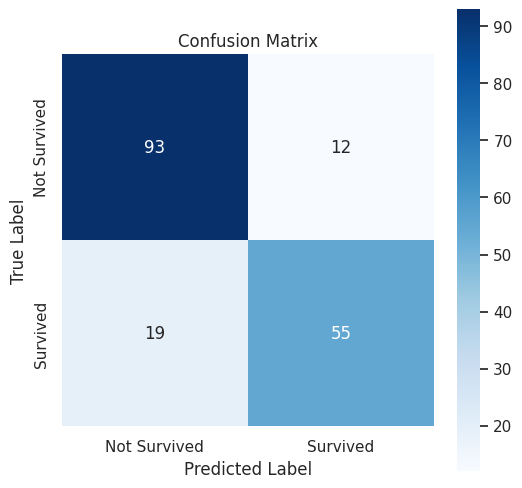

In [59]:
cm = confusion_matrix(y_test, y_pred_voting)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

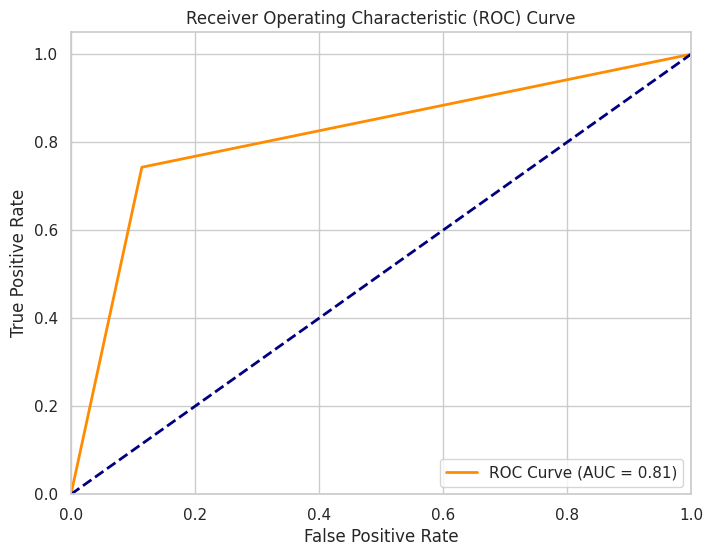

In [60]:
# Vytvoření ROC křivky
fpr, tpr, thresholds = roc_curve(y_test, y_pred_voting)
roc_auc = roc_auc_score(y_test, y_pred_voting)

# Vytvoření grafu ROC křivky
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
